### Image generation with trained Diffusion Model
Example of how to load a model and generate an image with it.

In [1]:
# Ensure notebook sees necessary paths
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [9]:
## Imports
from Architectures.DifussionModel import generate
from Trainers.DiffusionTrainer import TrainingConfig
from diffusers import DDPMPipeline
import torch
import glob
from PIL import Image

In [3]:
# loading the config
config = TrainingConfig().from_json("../configs/config1.json")

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pipeline = DDPMPipeline.from_pretrained(
    config.output_dir,
    torch_dtype=torch.float16,
    use_safetensors=True    
)
pipeline.to(device)

Loading pipeline components...: 100%|██████████| 2/2 [00:00<00:00, 13.01it/s]


DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.33.1",
  "_name_or_path": "Unet_Logger",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [5]:
# Generation!
generate(config, pipeline)

100%|██████████| 1000/1000 [00:37<00:00, 26.83it/s]


Saved 16 images + grid at: Unet_Logger\generated


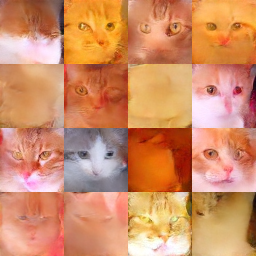

In [10]:
sample_images = sorted(glob.glob(f"{config.output_dir}/generated/grid.png"))
Image.open(sample_images[-1])